## APS 5 - ANÁLISE DA DIFUSÃO DE UM POLUENTE EM UM RIO COM CORRENTEZA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation

In [2]:
#constantes
deltaT = 30e-3
deltaXY = 1
T = 10

alpha = 1 #Valor alpha
K = 1 #coeficiente de difusão
Q = 100.0
Qc = Q / (round(deltaXY**2,2))
Tq = 5

n = 1

X = np.arange(0,30+deltaXY,deltaXY)
Y = np.arange(0,20+deltaXY,deltaXY)
t = np.arange(0,T+deltaT,deltaT)

nodeMatrix = np.zeros(shape =(len(X), len(Y)))

a = (np.abs(X - n/1.4)).argmin()
b = (np.abs(Y - 60/(5*n))).argmin()

Qc

100.0

In [3]:
def u(x,y):
    return alpha

def v(x,y):
    return alpha * math.sin((math.pi/5)*x)

In [4]:
def diff2Central(anterior, atual, prox, delta):
    return ((prox -(2*atual) + anterior) / (round(delta**2,2)))

def diffCentral(anterior, prox, delta):
    return ((prox - anterior) /  (round(delta**2,2)))

def diffAvancado(atual, prox, delta):
    return ((prox - atual) / delta)

In [5]:
#Aplica a conta específica na lista de nodes
def calcDiff2D(nodes_t, Qc):

#     print(nodes_t)

    for y in range(1,len(nodes_t)):
        for x in range(1,len(nodes_t[0])):
            

                
            if(x == 0):
                nodes_t[y][x] = nodes_t[y][x+1]
            elif(x == len(nodes_t[0])-1):
                nodes_t[y][x] = nodes_t[y][x-1]
            elif(y == 0):
                nodes_t[y][x] = nodes_t[y+1][x]
            elif(y == len(nodes_t)-1):
                nodes_t[y][x] = nodes_t[y-1][x]
            elif(x == a and y == b):
                p1 = u(x,y)*diffCentral(nodes_t[y][x-1], nodes_t[y][x+1], deltaXY)
                p2 = v(x,y)*diffCentral(nodes_t[y-1][x], nodes_t[y+1][x], deltaXY)
                p3 = diff2Central(nodes_t[y-1][x],nodes_t[y][x],nodes_t[y+1][x], deltaXY)
                p4 = diff2Central(nodes_t[y][x-1],nodes_t[y][x],nodes_t[y][x+1], deltaXY)
                
                nodes_t[y][x] = (Qc - (p1 +  p2 - K*(p3 + p4)))*deltaT + nodes_t[y][x]
            else:
                
                p1 = u(x,y)*diffCentral(nodes_t[y][x-1], nodes_t[y][x+1], deltaXY)
                p2 = v(x,y)*diffCentral(nodes_t[y-1][x], nodes_t[y+1][x], deltaXY)
                p3 = diff2Central(nodes_t[y-1][x],nodes_t[y][x],nodes_t[y+1][x], deltaXY)
                p4 = diff2Central(nodes_t[y][x-1],nodes_t[y][x],nodes_t[y][x+1], deltaXY)

                nodes_t[y][x] = (- (p1 +  p2 -K*(p3 + p4)))*deltaT + nodes_t[y][x] 
            

   
    return nodes_t

#
# Nodes: Lista de nós a ser calculada ; k: Numero máximo de iterações para resolução
# 
#
def doSomething(nodes_t,time):
    for l in range(len(time)):
        
        if(time[l]<Tq):
            nodes_t = calcDiff2D(nodes_t, Qc)
        else:
            nodes_t = calcDiff2D(nodes_t, 0)
       
        plt.imshow(nodes_t,cmap="winter",interpolation="nearest", vmin=0, vmax=15) 
        plt.axis("off")
        plt.colorbar()
        plt.savefig(f"./img/nodes{l}.png", dpi = 72)
        plt.close()

    
    return nodes_t


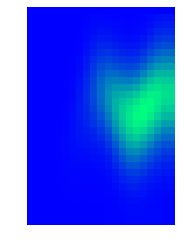

CPU times: user 1min 6s, sys: 7.74 s, total: 1min 14s
Wall time: 26.4 s


In [6]:
%%time
nodeMatrix = np.zeros(shape =(len(X), len(Y)))
nodeMatrix = doSomething(nodeMatrix,t)


plt.imshow(nodeMatrix,cmap="winter",interpolation="nearest")
plt.axis("off")
plt.savefig("archive", dpi = 72)
plt.show()


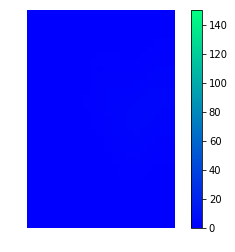

In [7]:
# nodeMatrix
copya = nodeMatrix.copy()
nodeMatrix[8][10] = 0
plt.imshow(nodeMatrix,cmap="winter",interpolation="nearest",vmin=0, vmax=150)
plt.axis("off")
plt.colorbar()
plt.savefig("archive", dpi = 72)
plt.show()


In [8]:
#O valor de copya é o ponto destacado em preto
# copya[1][10]

In [9]:

# nodeMatrix[8][10] = 0

In [10]:
# plt.imshow(copya,cmap="hot",interpolation="nearest",vmin=0, vmax=310)
# plt.axis("off")
# plt.colorbar()
# plt.savefig("archive", dpi = 72)
# plt.show()

In [15]:
import imageio
with imageio.get_writer('movie.gif', mode='I', duration=0.05) as writer:
    for i in range(0,len(t),2):
        image = imageio.imread(f"./img/nodes{i}.png")
        if(image is not None):
            writer.append_data(image)

In [16]:
!rm ./img/nodes*.png

In [13]:
!open .

In [14]:
math.pi

3.141592653589793